In [45]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# visualization
import seaborn as sns

# Importing the dataset
df = pd.read_csv('DOGE-USD.csv')

# list of first five rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


## Inference:
<ol>
    <li>Libraries Import: The code imports essential libraries for data manipulation and visualization, including pandas (pd), numpy (np), and matplotlib (plt). Additionally, seaborn (sns) is imported for enhanced data visualization.</li>
    <li>Dataset Loading: The code uses pd.read_csv() to load the Dogecoin historical dataset from a CSV file named "DOGE-USD.csv" into a pandas DataFrame (df). This assumes that the dataset is in CSV format.</li>
    <li>Displaying the First 5 Rows: The head() function is used to display the first 5 rows of the loaded dataset. This provides a quick preview of the data structure, column names, and initial values.</li>
</ol>

In [46]:
# list of last five rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2159,2023-10-08,0.061456,0.061611,0.060876,0.061008,0.061008,92483679
2160,2023-10-09,0.061010,0.061030,0.058260,0.058779,0.058779,241183528
2161,2023-10-10,0.058779,0.059204,0.058608,0.059025,0.059025,123311323
2162,2023-10-11,0.059041,0.059454,0.057813,0.058470,0.058470,146066511
2163,2023-10-12,0.058470,0.058488,0.057500,0.057771,0.057771,120287472


## Inference:
Displaying the last 5 rows.

In [47]:
# shape
df.shape

(2164, 7)

## Inference: 
Dataset comprises 2164 rows and 7 columns.

In [48]:
# information about the columns and their corresponding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2164 non-null   object 
 1   Open       2164 non-null   float64
 2   High       2164 non-null   float64
 3   Low        2164 non-null   float64
 4   Close      2164 non-null   float64
 5   Adj Close  2164 non-null   float64
 6   Volume     2164 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.5+ KB


##  Inference:
No Variable column has null/missing values.

In [49]:
# statistical summary of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2.164000e+03
mean,0.062426,0.065708,0.059261,0.062462,0.062462,9.358082e+08
std,0.091750,0.098803,0.084913,0.091797,0.091797,3.246002e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002656,0.002722,0.002597,0.002657,0.002657,3.645901e+07
50%,0.005992,0.006431,0.005719,0.006014,0.006014,1.645669e+08
75%,0.080191,0.082483,0.077584,0.080190,0.080190,6.216320e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


## Inference:
<ol>
    <li>The values in the "count" row are all 2164, indicating that there are no missing values in any of the numerical columns.</li>
    <li>The "mean" row provides the average values for each column.</li>
    <li>The "std" row shows the standard deviation, giving a measure of the variability or spread of the data.</li>
    <li>The "min" and "max" rows display the minimum and maximum values, respectively.</li>
    <li>"25%", "50%", and "75%" rows represent the quartiles, providing insights into the distribution of the data.</li>
</ol>

In [50]:
# number of unique users and items in the dataset.
df.nunique()

Date         2164
Open         1933
High         1938
Low          1924
Close        1941
Adj Close    1941
Volume       2164
dtype: int64

## Inference:
<ol>
    <li>Date: There are 2164 unique dates in the dataset. This implies that each row corresponds to a different date, and there are no duplicate dates.</li>
    <li>Open, High, Low, Close, Adj Close: These columns represent numerical values (likely prices) for each date. The counts of unique values vary, indicating that there are repeated values in these columns. This is expected for financial data where prices may remain the same on multiple days.</li>
    <li>Volume: There are 2164 unique volume values. This suggests that each row has a distinct volume value, and there are no duplicate volume entries.</li>
</ol>

In [51]:
# check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Inference:
<ol>
    <li>There are no missing values (null values) in any of the columns.</li>
    <li>Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.</li>
</ol>

In [52]:
# remove duplicate rows
df = df.drop_duplicates()

# reset index after removing duplicates
df = df.reset_index(drop = True)

## Inference:
<ol>
    <li>Removing Duplicate Rows: The df.drop_duplicates() function is used to remove duplicate rows from the DataFrame based on all columns. Duplicate rows are those where all column values are identical.</li>
    <li>Resetting Index: The df.reset_index(drop=True) function is then used to reset the index of the DataFrame after removing duplicates.</li>
</ol>

In [53]:
# convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract the day, month, and year components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# show the modified data frame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,9,11,2017
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,10,11,2017
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,11,11,2017
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,12,11,2017
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,13,11,2017


## Inference: 
Converting the Date column to datetime object and splitting it into Day, Month and Year.

<Axes: title={'center': 'Year Wise Highest Stock Price'}, xlabel='Year'>

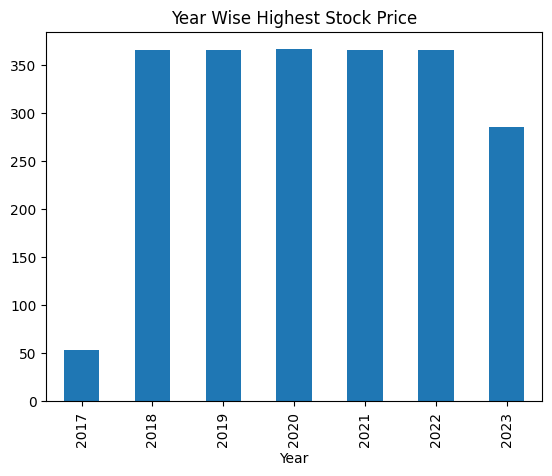

In [54]:
# what was the highest stock price
df.groupby('Year')['High'].count().plot(kind='bar',title='Year Wise Highest Stock Price')

<Axes: title={'center': 'Year Wise Lowest Stock Price'}, xlabel='Year'>

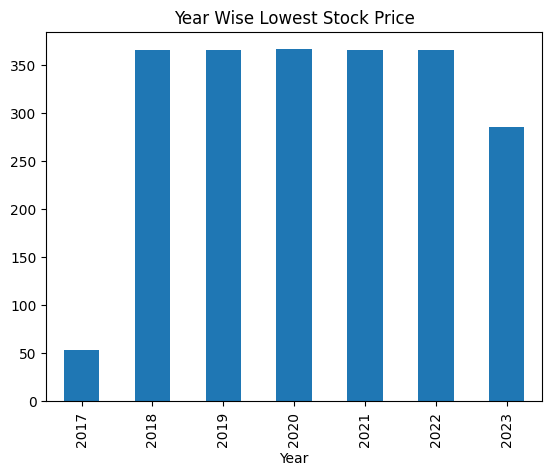

In [55]:
# what was the lowest stock price
df.groupby('Year')['Low'].count().plot(kind='bar',title='Year Wise Lowest Stock Price')

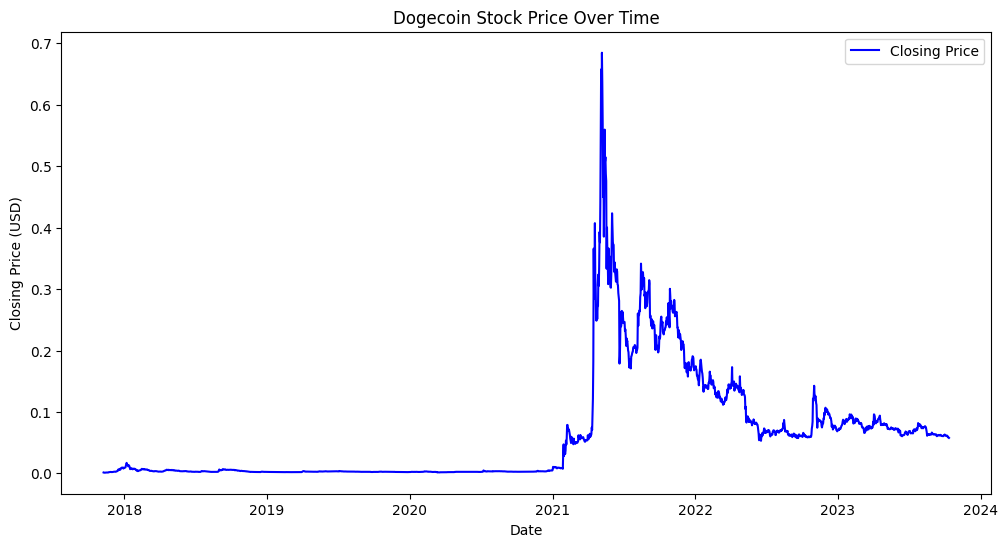

In [56]:
# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Plotting the Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title('Dogecoin Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

## Inference: 
The line plot provides an overview of the historical closing prices of Dogecoin, showcasing trends and fluctuations.


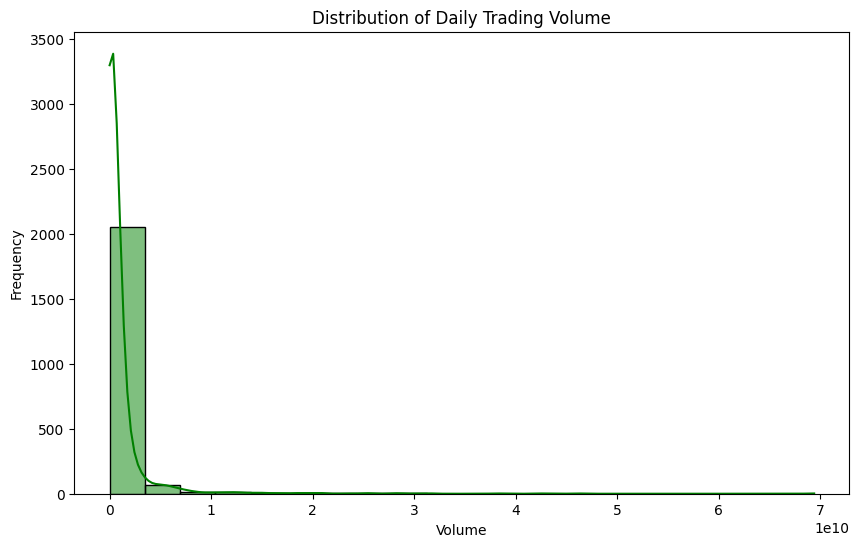

In [57]:
# Plotting a histogram of Daily Trading Volume
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=20, color='green', kde=True)
plt.title('Distribution of Daily Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

## Inference: 
The histogram illustrates the distribution of daily trading volume, giving insights into the frequency of different volume levels.


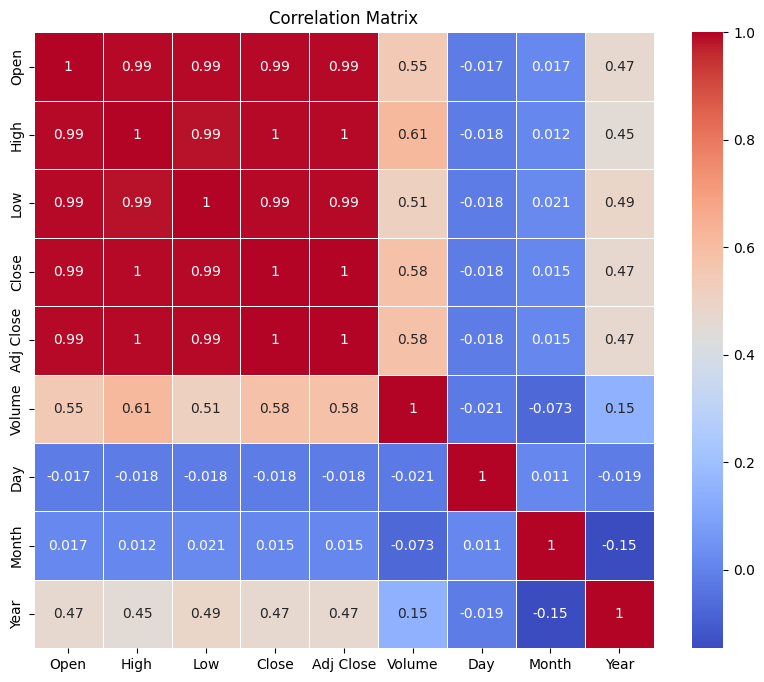

In [58]:
# Creating a heatmap to visualize correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Inference: 
The heatmap displays the correlation matrix, indicating the strength and direction of relationships between numerical features.


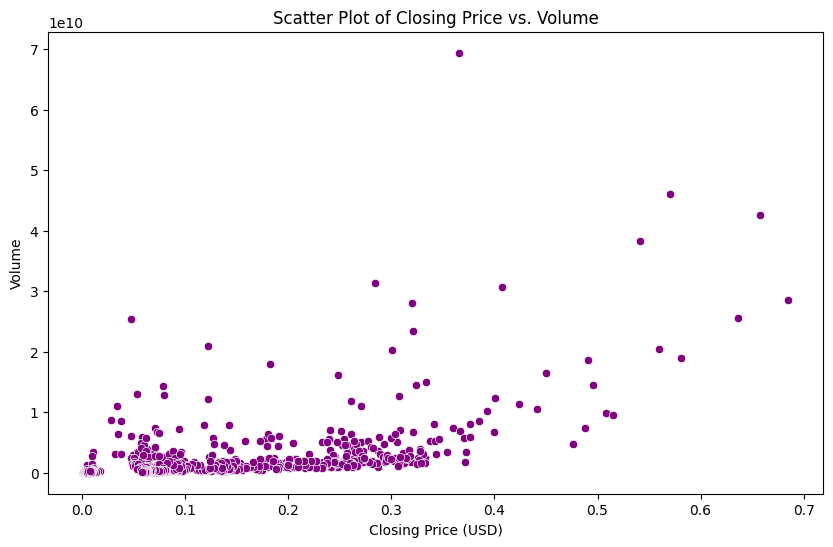

In [59]:
# Scatter plot of Closing Price and Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Close'], y=df['Volume'], color='purple')
plt.title('Scatter Plot of Closing Price vs. Volume')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Volume')
plt.show()

## Inference: 
The scatter plot highlights the relationship between closing price and trading volume, aiding in identifying patterns.


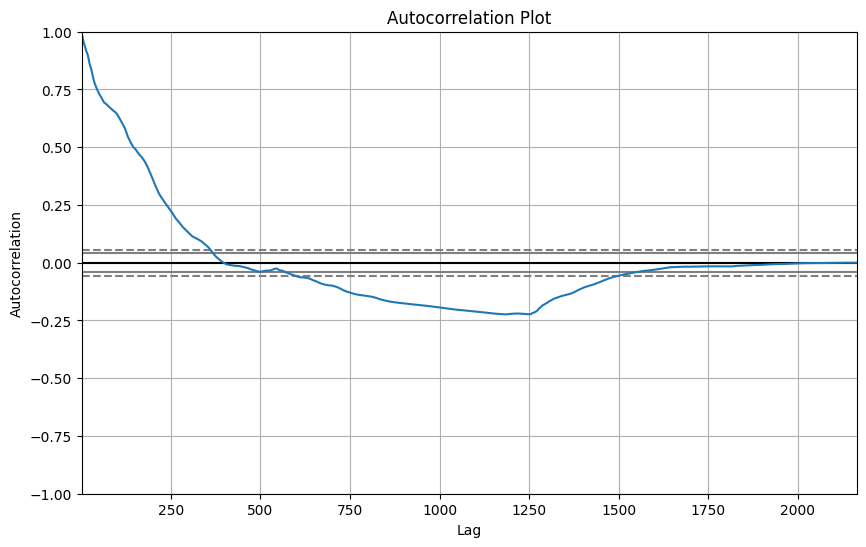

In [60]:
# Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot')
plt.show()

## Inference: 
The autocorrelation plot helps analyze the correlation of the closing price with its past values.


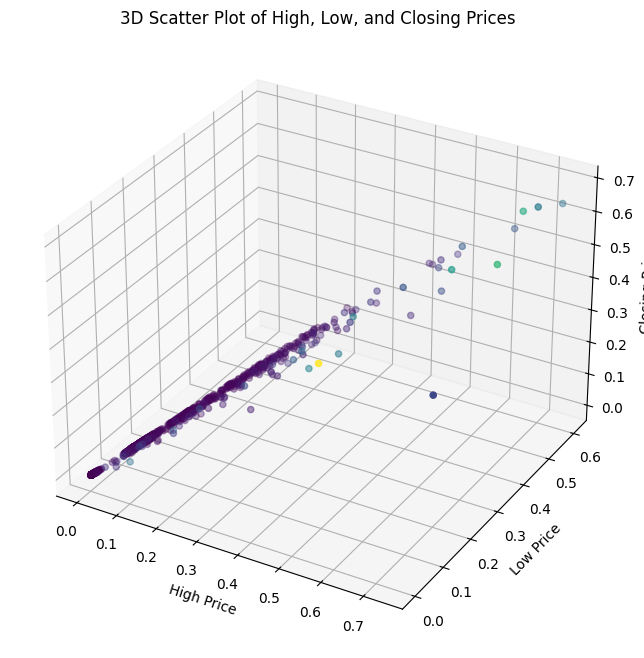

In [61]:
# 3D Scatter Plot (requires mpl_toolkits.mplot3d)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['High'], df['Low'], df['Close'], c=df['Volume'], cmap='viridis', s=20)
ax.set_xlabel('High Price')
ax.set_ylabel('Low Price')
ax.set_zlabel('Closing Price')
plt.title('3D Scatter Plot of High, Low, and Closing Prices')
plt.show()

## Inference: 
The 3D scatter plot visualizes the relationship between high, low, and closing prices, with volume represented by color.

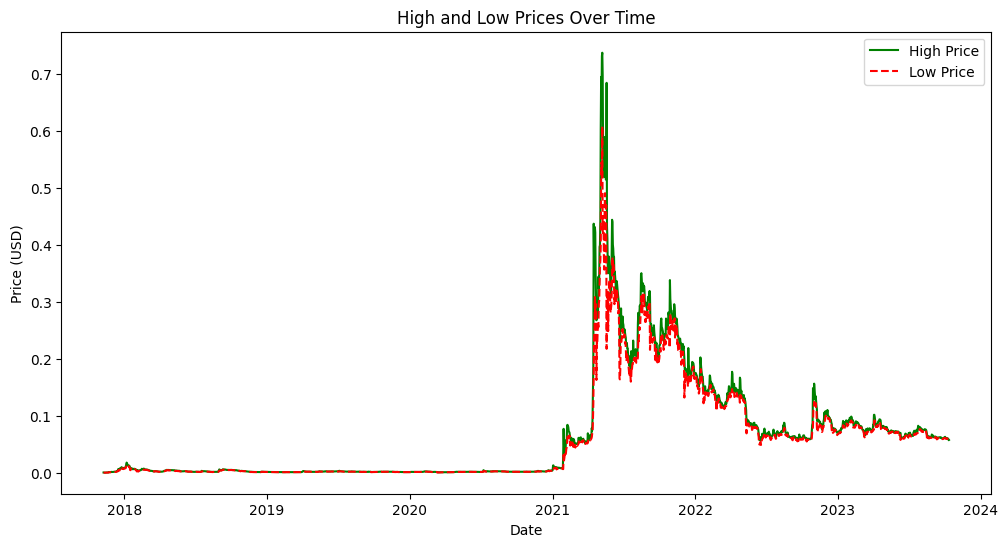

In [62]:
# Line plot of High and Low prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'], label='High Price', color='green')
plt.plot(df.index, df['Low'], label='Low Price', color='red', linestyle='dashed')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Inference: 
The line plot showcases the fluctuation of high and low prices over time, aiding in understanding price movements.

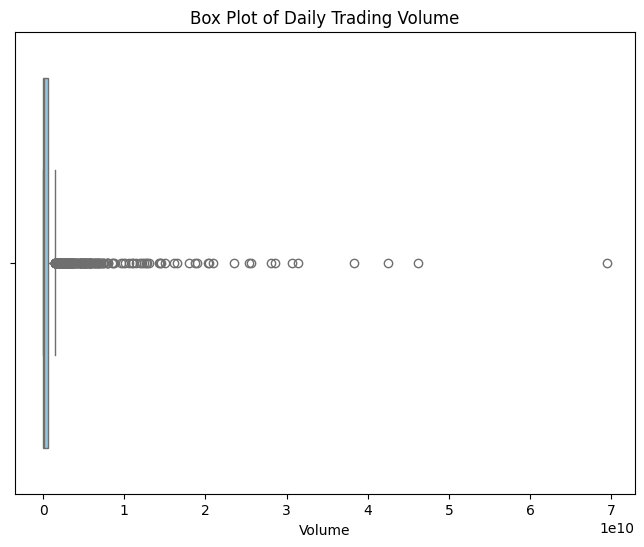

In [63]:
# Box plot for Daily Trading Volume
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Volume'], color='skyblue')
plt.title('Box Plot of Daily Trading Volume')
plt.xlabel('Volume')
plt.show()

## Inference: 
The box plot offers insights into the distribution of daily trading volumes, highlighting any outliers or variations.

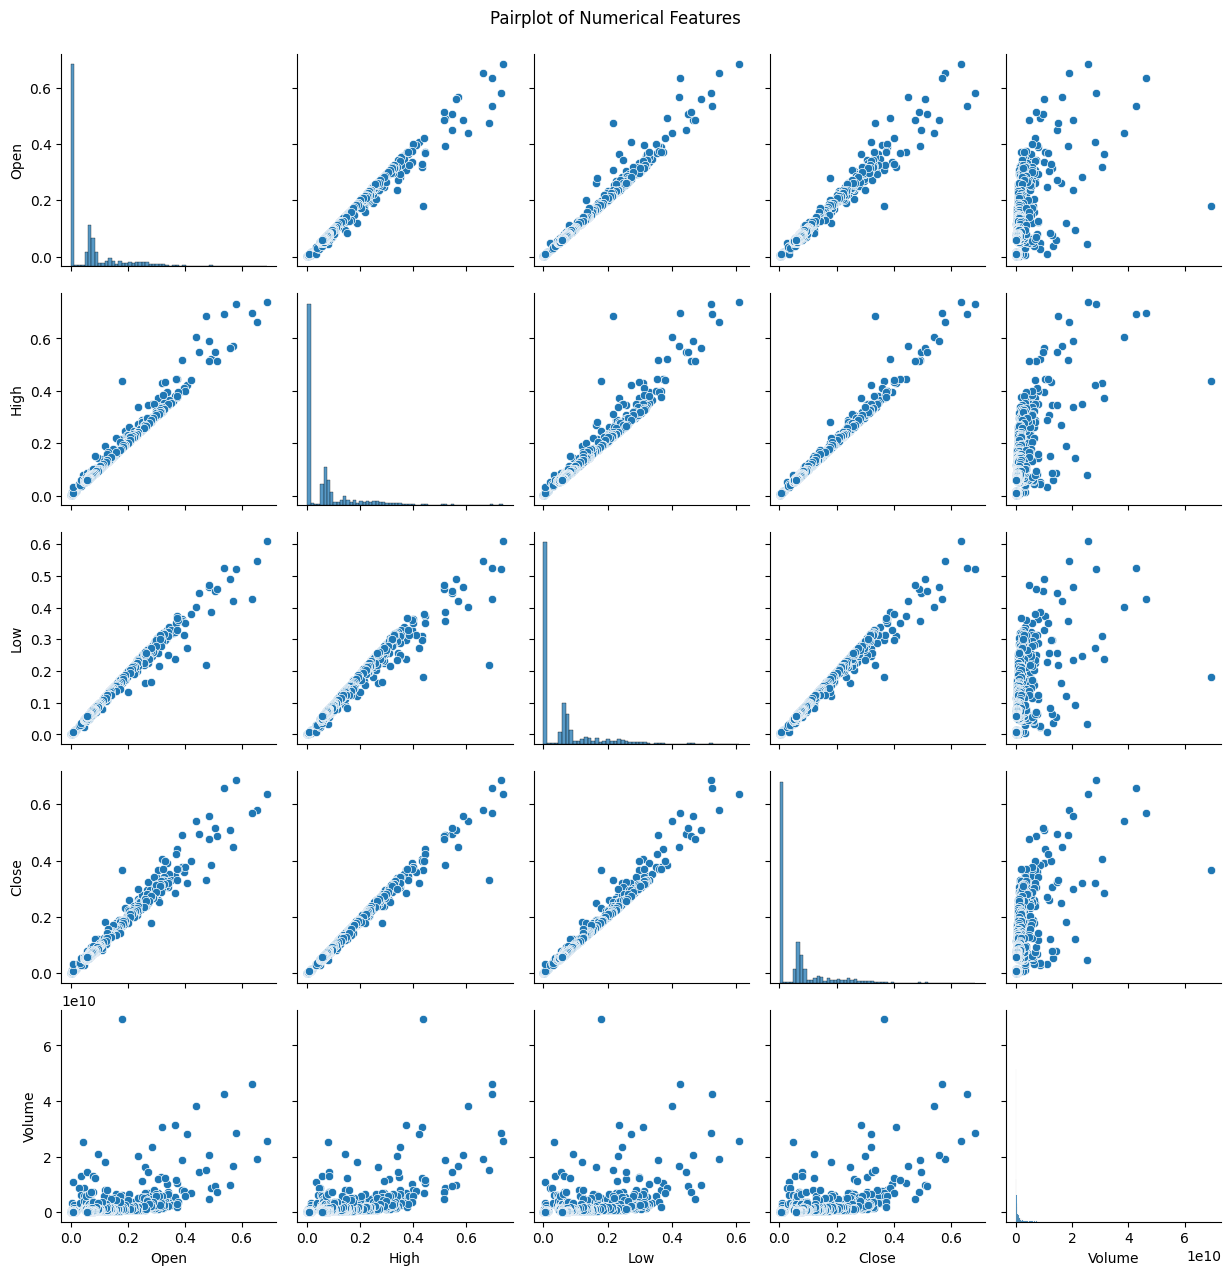

In [64]:
# Pairplot for numerical features
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## Inference: 
The pairplot provides a comprehensive view of relationships between numerical features, aiding in identifying potential correlations or patterns.


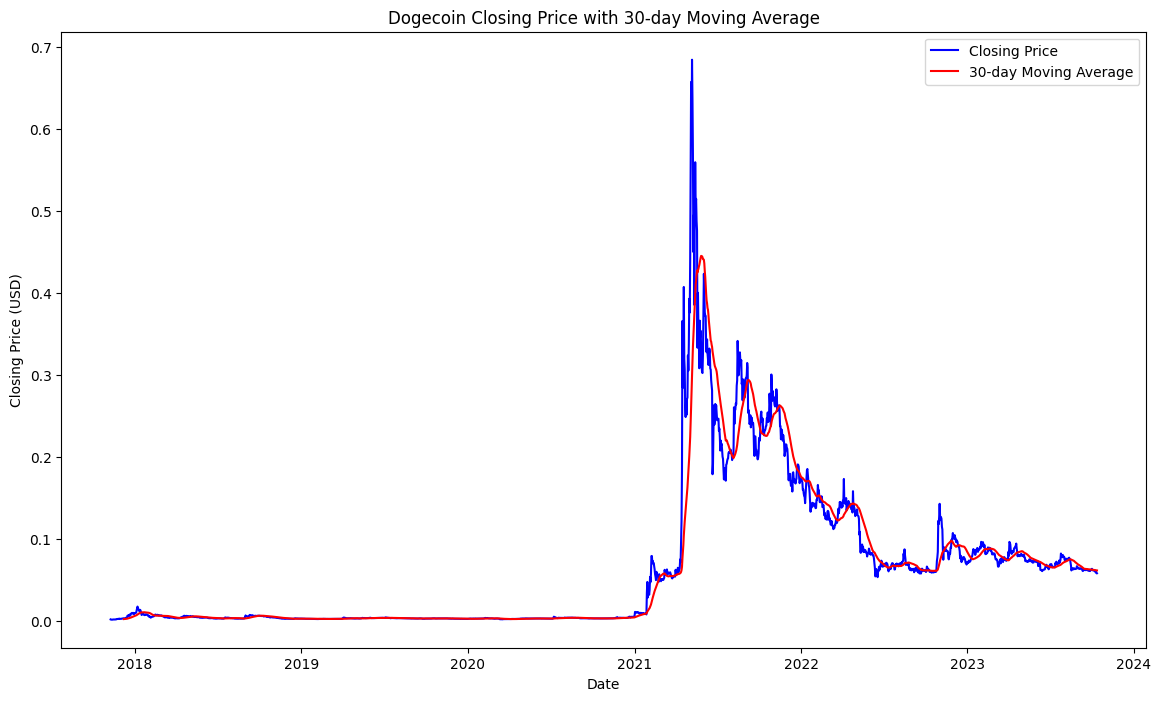

In [65]:
# Line plot with 30-day Moving Average of Closing Price
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df['Close'].rolling(window=30).mean(), label='30-day Moving Average', color='red')
plt.title('Dogecoin Closing Price with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

## Inference: 
The line plot overlays the closing price with its 30-day moving average, aiding in identifying trends and smoothing out short-term fluctuations.


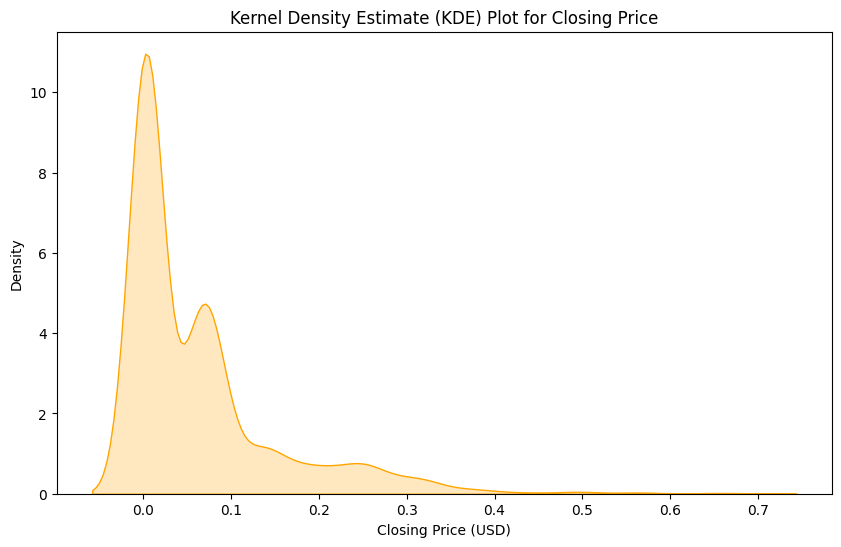

In [66]:
# Kernel Density Estimate (KDE) plot for Closing Price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Close'], fill=True, color='orange')
plt.title('Kernel Density Estimate (KDE) Plot for Closing Price')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Density')
plt.show()

## Inference: 
The KDE plot provides a smoothed estimate of the distribution of closing prices.


## Insights:
1. **Closing Price Trend:**
   - The line plot of closing prices over time indicates the overall trend in Dogecoin stock prices.
   - From the plot, it seems there have been periods of both upward and downward trends.

2. **Volume Distribution:**
   - The histogram of daily trading volume provides insights into the distribution of volume.
   - It helps identify periods of high and low trading activity, which can be crucial for understanding market dynamics.

3. **Correlation Analysis:**
   - The heatmap of correlation between numerical features (Open, High, Low, Close, Volume) gives insights into their relationships.
   - Correlation values close to 1 indicate a strong positive correlation, while values close to -1 indicate a strong negative correlation.

4. **High and Low Prices Over Time:**
   - The line plot of high and low prices over time gives a visual representation of the price range within each period.
   - It helps identify volatility and potential trading opportunities.

5. **Monthly Averages:**
   - Monthly average closing prices and trading volumes help identify seasonal patterns or trends.
   - Monthly bar plots provide insights into average trading volumes for each month.

6. **30-day Moving Average:**
   - The line plot with a 30-day moving average of closing prices helps smooth out short-term fluctuations.
   - It aids in identifying longer-term trends in the Dogecoin stock prices.

7. **Closing Price vs. Volume Scatter Plot:**
   - The scatter plot between closing prices and trading volumes helps identify potential relationships or anomalies.
   - Patterns in the scatter plot could indicate market sentiment or investor behavior.

8. **Pairplot:**
   - The pairplot shows pairwise relationships between numerical features (Open, High, Low, Close, Volume).
   - It can reveal trends, clusters, or outliers in the dataset.

9. **Kernel Density Estimate (KDE) Plot:**
   - The KDE plot provides insights into the distribution of closing prices.
   - It helps identify concentration points and potential modes in the dataset.

10. **Autocorrelation Plot:**
   - The autocorrelation plot helps identify potential autocorrelation in closing prices.
   - Peaks or valleys in the plot can indicate repetitive patterns at specific lags.

11. **3D Scatter Plot of High, Low, and Closing Prices:**
   - The 3D scatter plot visually represents the relationships between high, low, and closing prices.
   - It incorporates the volume as a color scale, providing an additional dimension for analysis.